In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
from matplotlib import pyplot as plt
import seaborn as sns

from sklearn.model_selection import cross_val_score, KFold
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.dummy import DummyClassifier

Объективные признаки:

 - Возраст
 - Рост
 - Вес
 - Пол
 

Результаты измерения:

 - Артериальное давление верхнее и нижнее
 - Холестерин
 - Глюкоза
 

Субъективные признаки:

 - Курение
 - Употребление Алкоголя
 - Физическая активность

In [2]:
data = pd.read_csv('data/train.csv.gz', compression='gzip', delimiter=';', index_col='id')
data.head()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
id,,,,,,,,,,,,
0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [3]:
data.describe()

,age,gender,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
count,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000,70000.000000
mean,19468.865814,1.349571,164.359229,74.205690,128.817286,96.630414,1.366871,1.226457,0.088129,0.053771,0.803729,0.499700
std,2467.251667,0.476838,8.210126,14.395757,154.011419,188.472530,0.680250,0.572270,0.283484,0.225568,0.397179,0.500003
min,10798.000000,1.000000,55.000000,10.000000,-150.000000,-70.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,17664.000000,1.000000,159.000000,65.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
50%,19703.000000,1.000000,165.000000,72.000000,120.000000,80.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000
75%,21327.000000,2.000000,170.000000,82.000000,140.000000,90.000000,2.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,23713.000000,2.000000,250.000000,200.000000,16020.000000,11000.000000,3.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [4]:
def get_X(df):
    return df.drop(['cardio'], axis=1)

def get_Y(df):
    return df['cardio']

In [5]:
def examine(clf, df):
    X, y = get_X(df), get_Y(df) 
    scores = cross_val_score(clf, X, y, cv=KFold(n_splits=5, shuffle=True, random_state=42), scoring='neg_log_loss')
    print("Log Loss: {}, std: {}".format(scores.mean(), 2 * scores.std())) 

In [22]:
clf = LogisticRegression(n_jobs=4, random_state=42)
examine(clf, data)

Log Loss: -0.5909670183331432, std: 0.003898502243326038


In [24]:
clf = XGBClassifier(seed=42, nthread=4)
examine(clf, data)

Log Loss: -0.5396301910766, std: 0.005472783959989331


In [31]:
clf = DummyClassifier()
examine(clf, data)

Log Loss: -17.311328140220592, std: 0.1624214584644185


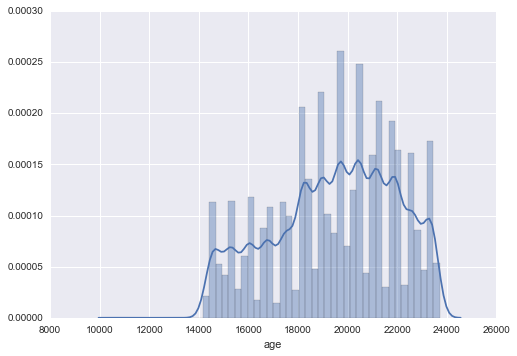

In [6]:
sns.distplot(data['age'])

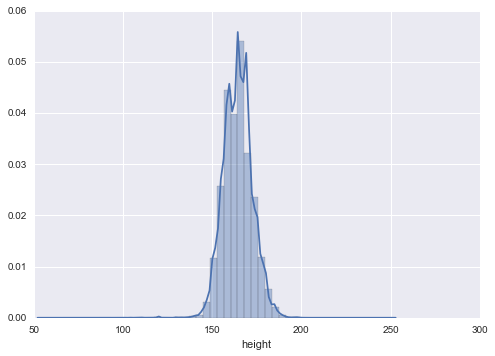

In [7]:
sns.distplot(data['height'])

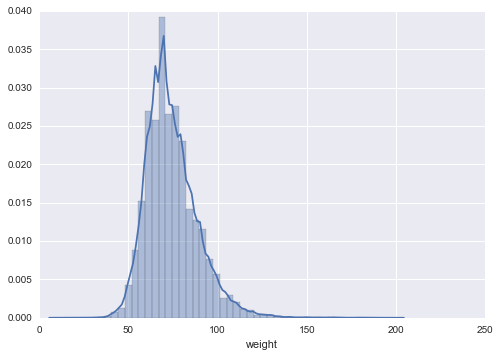

In [8]:
sns.distplot(data['weight'])

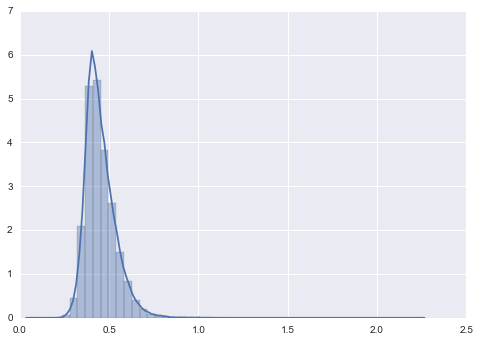

In [11]:
sns.distplot(data['weight'] / data['height'])

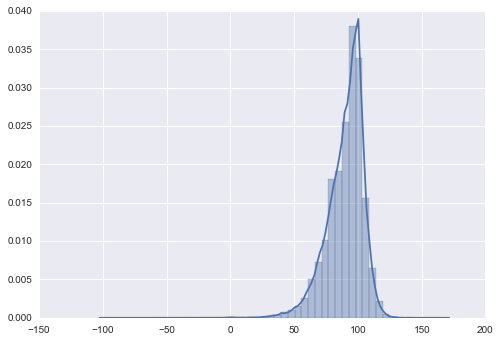

In [13]:
sns.distplot(data['height'] - data['weight'])

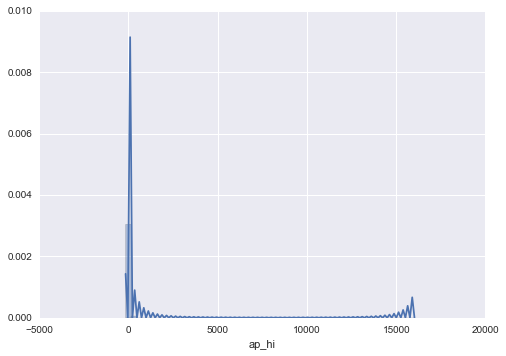

In [14]:
sns.distplot(data['ap_hi'])

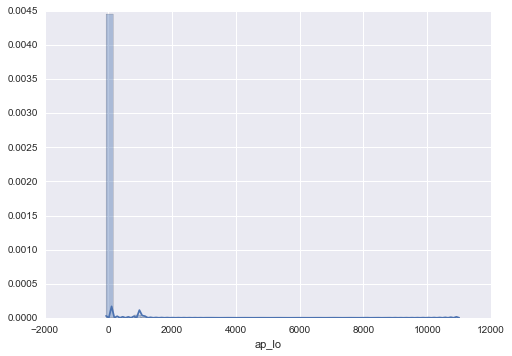

In [15]:
sns.distplot(data['ap_lo'])

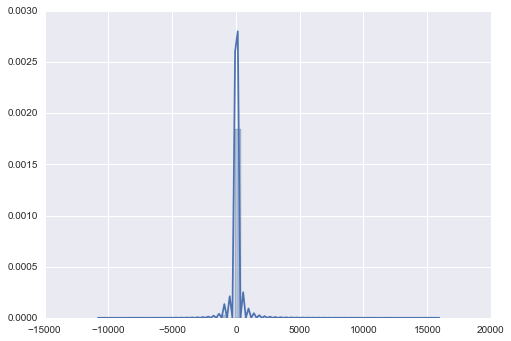

In [17]:
sns.distplot(data['ap_hi'] -  data['ap_lo'])